In [1]:
import pandas as pd

In [2]:
!pip install httpx==0.27.2
!pip install deep-translator




[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
file_path ='C:/Users/Tjoppie/Desktop/ASS3/data_tshikama_xls-1 (1).xlsx'
df = pd.read_excel(file_path)

In [4]:
df.dropna()

,CILUBA,FRANCAIS,SCORE,SENTIMENT,NATURE
0,Akaja,Arrange,1,Positif,Verbe
1,Akajilula,Rearrange,1,Positif,Verbe
2,Akula,Parle,2,Positif,Verbe
3,Akulula,Reparle,2,Positif,Verbe
4,Aluja,Remet,3,Positif,Verbe
...,...,...,...,...,...
2995,Tudi ne,elle a,0,Neutre,Verbe
2996,Nudi ne,nous avons,0,Neutre,Verbe
2997,badi ne,vous avez,0,Neutre,Verbe
2998,Tshiabu,pour eux,0,Neutre,Adjectif


In [5]:
df.insert(df.columns.get_loc('FRANCAIS') + 1, 'ENGLISH', '')
df.insert(df.columns.get_loc('ENGLISH') + 1, 'AFRIKAANS', '')
df.insert(df.columns.get_loc('AFRIKAANS') + 1,  'ZULU', '')
df.insert(df.columns.get_loc('ZULU') + 1,  'XHOSA', '') 

In [6]:
# Ensure columns are named correctly with additional SA languages
df.columns = ['ciluba', 'french','english','afrikaans', 'zulu', 'xhosa', 'score', 'sentiment', 'nature']

In [7]:
df.head()

,ciluba,french,english,afrikaans,zulu,xhosa,score,sentiment,nature
0,Akaja,Arrange,,,,,1,Positif,Verbe
1,Akajilula,Rearrange,,,,,1,Positif,Verbe
2,Akula,Parle,,,,,2,Positif,Verbe
3,Akulula,Reparle,,,,,2,Positif,Verbe
4,Aluja,Remet,,,,,3,Positif,Verbe


In [8]:
# Create translation and scoring dictionaries from the dataset/lexicon
translation_lexique = dict(zip(df['french'].str.lower(), df['ciluba']))
translation_french_to_english = dict(zip(df['french'].str.lower(), df['english'].str.lower()))
lexique = dict(zip(df['ciluba'].str.lower(), df['score']))


In [9]:
def translate_text_using_lexicon(text, translation_french_to_english):
 words = text.lower().split()
 translated_words = [translation_lexique.get(word, word) for word in words]
 translated_text = ' '.join(translated_words)
 return translated_text

In [10]:
def analyse_sentiment(text):
    words = text.lower().split()
    word_scores = {word: lexique.get(word, 0) for word in words}
    score = sum(word_scores.values())

    if score > 0.05:
        sentiment = "Positif"
    elif score < -0.05:
        sentiment = "Négatif"
    else:
        sentiment = "Neutre"

    return score, sentiment, word_scores

In [11]:
# Input text to translate. Note that you must create a dataset including a set of sentences to
french_text = "Arrange Seulement"

In [12]:
# Translate the text using the lexicon
translated_text = translate_text_using_lexicon(french_text, translation_lexique)

In [13]:
total_score, sentiment, word_scores = analyse_sentiment(translated_text)

In [14]:
print("Translated Text (Ciluba):", translated_text)
print("Total Score:", total_score)
print("Sentiment:", sentiment)
print("Word Scores:", word_scores)

Translated Text (Ciluba): Akaja Anu
Total Score: 5
Sentiment: Positif
Word Scores: {'akaja': 2, 'anu': 3}


In [15]:
from deep_translator import GoogleTranslator

# Automatically generate a lexicon based on the "french" column
# This lexicon will map unique French words to their English equivalents
translation_french_to_english_lexique = {}

# Define the function to translate French to English using deep-translator and the generated lexicon
def translate_text_using_french_to_english_lexicon(text):
    if isinstance(text, str):
        words = text.lower().split()
        translated_words = []
        for word in words:
            # If the word is not in the lexicon, translate it using deep-translator and add it to the lexicon
            if word in translation_french_to_english_lexique:
                translated_word = translation_french_to_english_lexique[word]
            else:
                # Automatically translate the word and add it to the lexicon
                translated_word = GoogleTranslator(source='fr', target='en').translate(word)
                translation_french_to_english_lexique[word] = translated_word
            translated_words.append(translated_word)
        return ' '.join(translated_words)
    else:
        return text  # Return the original entry if it's not a string

# Now, we'll create the 'english' column based on the 'french' column
# Iterate through the entire 'french' column and translate the words
df['english'] = df['french'].apply(translate_text_using_french_to_english_lexicon)

# Display the updated dataframe with the French words in the 'french' column
# and the translated English words in the 'english' column
print(df[['french', 'english']].head())  # This will show the first few rows of the French-English translation


      french      english
0    Arrange      arrange
1  Rearrange    rearrange
2      Parle        speak
3    Reparle  speak again
4      Remet   hands over


In [16]:
df.head()

,ciluba,french,english,afrikaans,zulu,xhosa,score,sentiment,nature
0,Akaja,Arrange,arrange,,,,1,Positif,Verbe
1,Akajilula,Rearrange,rearrange,,,,1,Positif,Verbe
2,Akula,Parle,speak,,,,2,Positif,Verbe
3,Akulula,Reparle,speak again,,,,2,Positif,Verbe
4,Aluja,Remet,hands over,,,,3,Positif,Verbe


In [17]:
from deep_translator import GoogleTranslator

# Automatically generate a lexicon based on the "english" column
# This lexicon will map unique English words to their Afrikaans equivalents
translation_english_to_afrikaans_lexique = {}

# Define the function to translate English to Afrikaans using deep-translator and the generated lexicon
def translate_text_using_english_to_afrikaans_lexicon(text):
    if isinstance(text, str):
        words = text.lower().split()
        translated_words = []
        for word in words:
            # If the word is not in the lexicon, translate it using deep-translator and add it to the lexicon
            if word in translation_english_to_afrikaans_lexique:
                translated_word = translation_english_to_afrikaans_lexique[word]
            else:
                # Automatically translate the word and add it to the lexicon
                translated_word = GoogleTranslator(source='en', target='af').translate(word)
                translation_english_to_afrikaans_lexique[word] = translated_word
            translated_words.append(translated_word)
        return ' '.join(translated_words)
    else:
        return text  # Return the original entry if it's not a string

# Now, we'll create the 'afrikaans' column based on the 'english' column
# Iterate through the entire 'english' column and translate the words
df['afrikaans'] = df['english'].apply(translate_text_using_english_to_afrikaans_lexicon)

# Display the updated dataframe with the English words in the 'english' column
# and the translated Afrikaans words in the 'afrikaans' column
print(df[['english', 'afrikaans']].head())  # This will show the first few rows of the English-Afrikaans translation


       english    afrikaans
0      arrange         reël
1    rearrange  herrangskik
2        speak        praat
3  speak again   praat weer
4   hands over    hande oor


In [18]:
df.head()

,ciluba,french,english,afrikaans,zulu,xhosa,score,sentiment,nature
0,Akaja,Arrange,arrange,reël,,,1,Positif,Verbe
1,Akajilula,Rearrange,rearrange,herrangskik,,,1,Positif,Verbe
2,Akula,Parle,speak,praat,,,2,Positif,Verbe
3,Akulula,Reparle,speak again,praat weer,,,2,Positif,Verbe
4,Aluja,Remet,hands over,hande oor,,,3,Positif,Verbe


In [19]:
from deep_translator import GoogleTranslator, exceptions

# Automatically generate a lexicon based on the "afrikaans" column
translation_english_to_zulu_lexique = {}

# Define the function to translate Afrikaans to Zulu using deep-translator and the generated lexicon
def translate_text_using_english_to_zulu_lexicon(text):
    if isinstance(text, str):
        words = text.lower().split()
        translated_words = []
        for word in words:
            # Check if the word is already in the lexicon
            if word in translation_english_to_zulu_lexique:
                translated_word = translation_english_to_zulu_lexique[word]
            else:
                try:
                    # Automatically translate the word and add it to the lexicon
                    translated_word = GoogleTranslator(source='en', target='zu').translate(word)
                    translation_english_to_zulu_lexique[word] = translated_word
                except exceptions.TranslationNotFound:
                    # If translation is not found, use the original word
                    translated_word = word
            translated_words.append(translated_word)
        return ' '.join(translated_words)
    else:
        return text  # Return the original entry if it's not a string

# Now, we'll create the 'zulu' column based on the 'afrikaans' column
df['zulu'] = df['english'].apply(translate_text_using_english_to_zulu_lexicon)

# Display the updated dataframe with the Afrikaans words in the 'afrikaans' column
# and the translated Zulu words in the 'zulu' column
print(df[['english', 'zulu']].head())


       english           zulu
0      arrange          hlela
1    rearrange  hlela kabusha
2        speak        khuluma
3  speak again  khuluma futhi
4   hands over  izandla phezu


In [20]:
df.head()

,ciluba,french,english,afrikaans,zulu,xhosa,score,sentiment,nature
0,Akaja,Arrange,arrange,reël,hlela,,1,Positif,Verbe
1,Akajilula,Rearrange,rearrange,herrangskik,hlela kabusha,,1,Positif,Verbe
2,Akula,Parle,speak,praat,khuluma,,2,Positif,Verbe
3,Akulula,Reparle,speak again,praat weer,khuluma futhi,,2,Positif,Verbe
4,Aluja,Remet,hands over,hande oor,izandla phezu,,3,Positif,Verbe


In [21]:
from deep_translator import GoogleTranslator

# Automatically generate a lexicon based on the "zulu" column
# This lexicon will map unique Zulu words to their Xhosa equivalents
translation_english_to_xhosa_lexique = {}

# Define the function to translate Zulu to Xhosa using deep-translator and the generated lexicon
def translate_text_using_english_to_xhosa_lexicon(text):
    if isinstance(text, str):
        words = text.lower().split()
        translated_words = []
        for word in words:
            # If the word is not in the lexicon, translate it using deep-translator and add it to the lexicon
            if word in translation_english_to_xhosa_lexique:
                translated_word = translation_english_to_xhosa_lexique[word]
            else:
                # Automatically translate the word and add it to the lexicon
                translated_word = GoogleTranslator(source='en', target='xh').translate(word)
                translation_english_to_xhosa_lexique[word] = translated_word
            translated_words.append(translated_word)
        return ' '.join(translated_words)
    else:
        return text  # Return the original entry if it's not a string

# Now, we'll create the 'xhosa' column based on the 'zulu' column
# Iterate through the entire 'zulu' column and translate the words
df['xhosa'] = df['english'].apply(translate_text_using_english_to_xhosa_lexicon)

# Display the updated dataframe with the Zulu words in the 'zulu' column
# and the translated Xhosa words in the 'xhosa' column
print(df[['english', 'xhosa']].head())  # This will show the first few rows of the Zulu-Xhosa translation


       english                xhosa
0      arrange            cwangcisa
1    rearrange  cwangcisa ngokutsha
2        speak               thetha
3  speak again      thetha kwakhona
4   hands over     izandla ngaphaya


In [22]:
df.head()

,ciluba,french,english,afrikaans,zulu,xhosa,score,sentiment,nature
0,Akaja,Arrange,arrange,reël,hlela,cwangcisa,1,Positif,Verbe
1,Akajilula,Rearrange,rearrange,herrangskik,hlela kabusha,cwangcisa ngokutsha,1,Positif,Verbe
2,Akula,Parle,speak,praat,khuluma,thetha,2,Positif,Verbe
3,Akulula,Reparle,speak again,praat weer,khuluma futhi,thetha kwakhona,2,Positif,Verbe
4,Aluja,Remet,hands over,hande oor,izandla phezu,izandla ngaphaya,3,Positif,Verbe


In [23]:
from deep_translator import GoogleTranslator
import pandas as pd

# Assume these translation lexicons are predefined:
# translation_french_to_english_lexique
# translation_english_to_afrikaans_lexique
# translation_english_to_zulu_lexique
# translation_english_to_xhosa_lexique

translator_en_afr = GoogleTranslator(source='en', target='af')
translator_en_zul = GoogleTranslator(source='en', target='zu')
translator_en_xho = GoogleTranslator(source='en', target='xh')
translator_fr_en = GoogleTranslator(source='fr', target='en')

# Sample sentiment scores
sentiment_scores = {
    "Subject": 1,
    "Verb": 2,
    "Adjective": 3
}

# Initialize an empty list to hold the structured data
data = []

# Define a function to translate and add words along with sentiment and nature
def translate_and_add_to_data(ciluba_word, french_word, nature):
    """Translate French word to English, then to Afrikaans, Zulu, and Xhosa, add sentiment and nature."""
    
    # Translate French to English and update the lexicon if necessary
    if french_word not in translation_french_to_english_lexique:
        translation_french_to_english_lexique[french_word] = translator_fr_en.translate(french_word)
    english_word = translation_french_to_english_lexique[french_word]
    
    # Translate English to Afrikaans, Zulu, and Xhosa, updating lexicons if needed
    if english_word not in translation_english_to_afrikaans_lexique:
        translation_english_to_afrikaans_lexique[english_word] = translator_en_afr.translate(english_word)
    afrikaans_word = translation_english_to_afrikaans_lexique[english_word]
    
    if english_word not in translation_english_to_zulu_lexique:
        translation_english_to_zulu_lexique[english_word] = translator_en_zul.translate(english_word)
    zulu_word = translation_english_to_zulu_lexique[english_word]
    
    if english_word not in translation_english_to_xhosa_lexique:
        translation_english_to_xhosa_lexique[english_word] = translator_en_xho.translate(english_word)
    xhosa_word = translation_english_to_xhosa_lexique[english_word]
    
    # Add word details along with sentiment score and nature to the data list
    data.append({
        "ciluba": ciluba_word,
        "french": french_word,
        "english": english_word,
        "afrikaans": afrikaans_word,
        "zulu": zulu_word,
        "xhosa": xhosa_word,
        "sentiment": sentiment_scores[nature],  # Assign sentiment based on the nature
        "nature": nature
    })

# Define initial word lists for subjects, verbs, and adjectives in Ciluba and French
subjects = {
    "ciluba": ["mwana", "mbwa", "katanga", "mwashi", "kisaka"],
    "french": ["enfant", "chien", "chat", "professeur", "oiseau"]
}

verbs = {
    "ciluba": ["tshimbila", "sanka", "kutala", "baluka", "lumba"],
    "french": ["court", "sauter", "parle", "vole", "chante"]
}

adjectives = {
    "ciluba": ["joko", "kyambala", "luzitu", "kinene", "kasala"],
    "french": ["heureux", "rapide", "fort", "brillant", "coloré"]
}

# Add subjects
for ciluba_word, french_word in zip(subjects["ciluba"], subjects["french"]):
    translate_and_add_to_data(ciluba_word, french_word, "Subject")

# Add verbs
for ciluba_word, french_word in zip(verbs["ciluba"], verbs["french"]):
    translate_and_add_to_data(ciluba_word, french_word, "Verb")

# Add adjectives
for ciluba_word, french_word in zip(adjectives["ciluba"], adjectives["french"]):
    translate_and_add_to_data(ciluba_word, french_word, "Adjective")

# Convert to DataFrame and display
translated_words_df = pd.DataFrame(data)
print(translated_words_df)


       ciluba      french  english   afrikaans         zulu           xhosa  \
0       mwana      enfant    child        kind       ingane        umntwana   
1        mbwa       chien      dog        hond         inja            inja   
2     katanga        chat      cat         kat        ikati           ikati   
3      mwashi  professeur  teacher  onderwyser      uthisha       utitshala   
4      kisaka      oiseau     bird        voël       inyoni          intaka   
5   tshimbila       court    short        kort    kufushane       mfutshane   
6       sanka      sauter     jump      spring        gxuma           tsiba   
7      kutala       parle    speak       praat      khuluma          thetha   
8      baluka        vole   stolen     gesteel      eyebiwe           ibiwe   
9       lumba      chante     sung      gesing      kuculwe         kuculwa   
10       joko     heureux    happy    gelukkig    ngijabule      ndonwabile   
11   kyambala      rapide     fast      vinnig  ngok

In [24]:
from deep_translator import GoogleTranslator
import pandas as pd
import random

# Assume these translation lexicons are predefined:
# translation_french_to_english_lexique
# translation_english_to_afrikaans_lexique
# translation_english_to_zulu_lexique
# translation_english_to_xhosa_lexique

translator_en_afr = GoogleTranslator(source='en', target='af')
translator_en_zul = GoogleTranslator(source='en', target='zu')
translator_en_xho = GoogleTranslator(source='en', target='xh')
translator_fr_en = GoogleTranslator(source='fr', target='en')

# Define sentiment scores for words
sentiment_scores = {
    "subjects": {"man": 2, "woman": 3, "child": 1, "dog": 1, "bird": 1},
    "verbs": {"runs": 1, "jumps": 2, "talks": 1, "flies": 2, "sings": 3},
    "adjectives": {"happy": 3, "quick": 2, "bright": 2, "strong": 3, "colorful": 2}
}

# Sentence templates for better structure
sentence_templates = [
    "The {adjective} {subject} {verb}.",
    "{subject} is {adjective} and {verb} every day.",
    "A {adjective} {subject} {verb} quickly."
]

# Generate translations for missing words in lexicons dynamically
def get_or_translate(word, lexicon, translator):
    """Translate and update lexicon if word is not found."""
    if word not in lexicon:
        lexicon[word] = translator.translate(word)
    return lexicon[word]

def translate_sentence(sentence):
    """Translate each word in an English sentence using the specified lexicons."""
    words = sentence.split()
    
    # Translate each word using the lexicons with dynamic fallback
    afrikaans_translation = [get_or_translate(word, translation_english_to_afrikaans_lexique, translator_en_afr) for word in words]
    zulu_translation = [get_or_translate(word, translation_english_to_zulu_lexique, translator_en_zul) for word in words]
    xhosa_translation = [get_or_translate(word, translation_english_to_xhosa_lexique, translator_en_xho) for word in words]
    
    return {
        "English Sentence": sentence,
        "Afrikaans Sentence": ' '.join(afrikaans_translation),
        "Zulu Sentence": ' '.join(zulu_translation),
        "Xhosa Sentence": ' '.join(xhosa_translation)
    }

# Generate a structured English sentence and calculate its sentiment score
def generate_structured_sentence():
    """Create an English sentence using the template and word lists, with a sentiment score."""
    # Select a random template
    template = random.choice(sentence_templates)
    
    # Choose words for each part of the sentence
    subject = random.choice(list(sentiment_scores["subjects"].keys()))
    verb = random.choice(list(sentiment_scores["verbs"].keys()))
    adjective = random.choice(list(sentiment_scores["adjectives"].keys()))
    
    # Format the sentence
    sentence = template.format(subject=subject, verb=verb, adjective=adjective)
    
    # Calculate the sentiment score for the sentence
    sentiment_score = (
        sentiment_scores["subjects"].get(subject, 0) +
        sentiment_scores["verbs"].get(verb, 0) +
        sentiment_scores["adjectives"].get(adjective, 0)
    )
    
    return sentence, sentiment_score

# Create the corpus with multiple sentences
def create_translation_testing_corpus(num_sentences=10):
    corpus = []
    for _ in range(num_sentences):
        english_sentence, sentiment_score = generate_structured_sentence()
        translated_sentences = translate_sentence(english_sentence)
        translated_sentences["Sentiment Score"] = sentiment_score  # Add the sentiment score to the output
        corpus.append(translated_sentences)
    
    return pd.DataFrame(corpus)

# Usage example
testing_corpus = create_translation_testing_corpus(num_sentences=10)
print(testing_corpus)


                         English Sentence  \
0  child is colorful and flies every day.   
1             A quick bird sings quickly.   
2       dog is happy and talks every day.   
3           A strong child sings quickly.   
4      dog is strong and flies every day.   
5                   The bright dog flies.   
6      woman is happy and runs every day.   
7                  The happy child jumps.   
8                   The strong dog talks.   
9    woman is bright and sings every day.   

                        Afrikaans Sentence  \
0      kind is kleurvol en vlieë elke dag.   
1               A vinnig voël sing vinnig.   
2  hond is gelukkig en praatjies elke dag.   
3                A sterk kind sing vinnig.   
4         hond is sterk en vlieë elke dag.   
5                   Die helder hond vlieë.   
6     vrou is gelukkig en lopies elke dag.   
7                Die gelukkig kind spring.   
8                Die sterk hond praatjies.   
9         vrou is helder en sing elke dag.  

In [25]:
!pip install tabulate
from deep_translator import GoogleTranslator
import pandas as pd
import random

# Assume these translation lexicons are predefined:
# translation_french_to_english_lexique
# translation_english_to_afrikaans_lexique
# translation_english_to_zulu_lexique
# translation_english_to_xhosa_lexique

translator_en_afr = GoogleTranslator(source='en', target='af')
translator_en_zul = GoogleTranslator(source='en', target='zu')
translator_en_xho = GoogleTranslator(source='en', target='xh')
translator_fr_en = GoogleTranslator(source='fr', target='en')

# Define sentiment scores for words
sentiment_scores = {
    "subjects": {"man": 2, "woman": 3, "child": 1, "dog": 1, "bird": 1},
    "verbs": {"runs": 1, "jumps": 2, "talks": 1, "flies": 2, "sings": 3},
    "adjectives": {"happy": 3, "quick": 2, "bright": 2, "strong": 3, "colorful": 2}
}

# Sentence templates for better structure
sentence_templates = [
    "The {adjective} {subject} {verb}.",
    "{subject} is {adjective} and {verb} every day.",
    "A {adjective} {subject} {verb} quickly."
]

# Generate translations for missing words in lexicons dynamically
def get_or_translate(word, lexicon, translator):
    if word not in lexicon:
        lexicon[word] = translator.translate(word)
    return lexicon[word]

def translate_sentence(sentence):
    words = sentence.split()
    
    afrikaans_translation = [get_or_translate(word, translation_english_to_afrikaans_lexique, translator_en_afr) for word in words]
    zulu_translation = [get_or_translate(word, translation_english_to_zulu_lexique, translator_en_zul) for word in words]
    xhosa_translation = [get_or_translate(word, translation_english_to_xhosa_lexique, translator_en_xho) for word in words]
    
    return {
        "English Sentence": sentence,
        "Afrikaans Sentence": ' '.join(afrikaans_translation),
        "Zulu Sentence": ' '.join(zulu_translation),
        "Xhosa Sentence": ' '.join(xhosa_translation)
    }

# Generate a structured English sentence and calculate its sentiment score
def generate_structured_sentence():
    template = random.choice(sentence_templates)
    subject = random.choice(list(sentiment_scores["subjects"].keys()))
    verb = random.choice(list(sentiment_scores["verbs"].keys()))
    adjective = random.choice(list(sentiment_scores["adjectives"].keys()))
    
    sentence = template.format(subject=subject, verb=verb, adjective=adjective)
    sentiment_score = (
        sentiment_scores["subjects"].get(subject, 0) +
        sentiment_scores["verbs"].get(verb, 0) +
        sentiment_scores["adjectives"].get(adjective, 0)
    )
    
    return sentence, sentiment_score

# Create the corpus with multiple sentences
def create_translation_testing_corpus(num_sentences=10):
    corpus = []
    for _ in range(num_sentences):
        english_sentence, sentiment_score = generate_structured_sentence()
        translated_sentences = translate_sentence(english_sentence)
        translated_sentences["Sentiment Score"] = sentiment_score
        corpus.append(translated_sentences)
    
    return pd.DataFrame(corpus)

# Usage example
testing_corpus = create_translation_testing_corpus(num_sentences=10)
print(testing_corpus.to_markdown(index=False))  # Use to_markdown for cleaner display in some environments



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


| English Sentence                     | Afrikaans Sentence                   | Zulu Sentence                                            | Xhosa Sentence                                        |   Sentiment Score |
|:-------------------------------------|:-------------------------------------|:---------------------------------------------------------|:------------------------------------------------------|------------------:|
| dog is colorful and jumps every day. | hond is kleurvol en spring elke dag. | inja kuyinto ezimibalabala futhi gxuma zonke usuku.      | inja yi ezinemibala kwaye imitsi yonke usuku.         |                 5 |
| A quick dog flies quickly.           | A vinnig hond vlieë vinnig.          | A ngokushesha inja izimpukane ngokushesha.               | A ngokukhawuleza inja iimpukane ngokukhawuleza.       |                 5 |
| dog is strong and talks every day.   | hond is sterk en praatjies elke dag. | inja kuyinto eqinile futhi izinkulumo zonke usuku.       | i

In [39]:
df1 = df


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
    --------------------------------------- 0.0/1.7 MB 991.0 kB/s eta 0:00:02
   --------- ------------------------------ 0.4/1.7 MB 5.4 MB/s eta 0:00:01
   ------------------------------------- -- 1.6/1.7 MB 12.9 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 13.7 MB/s eta 0:00:00


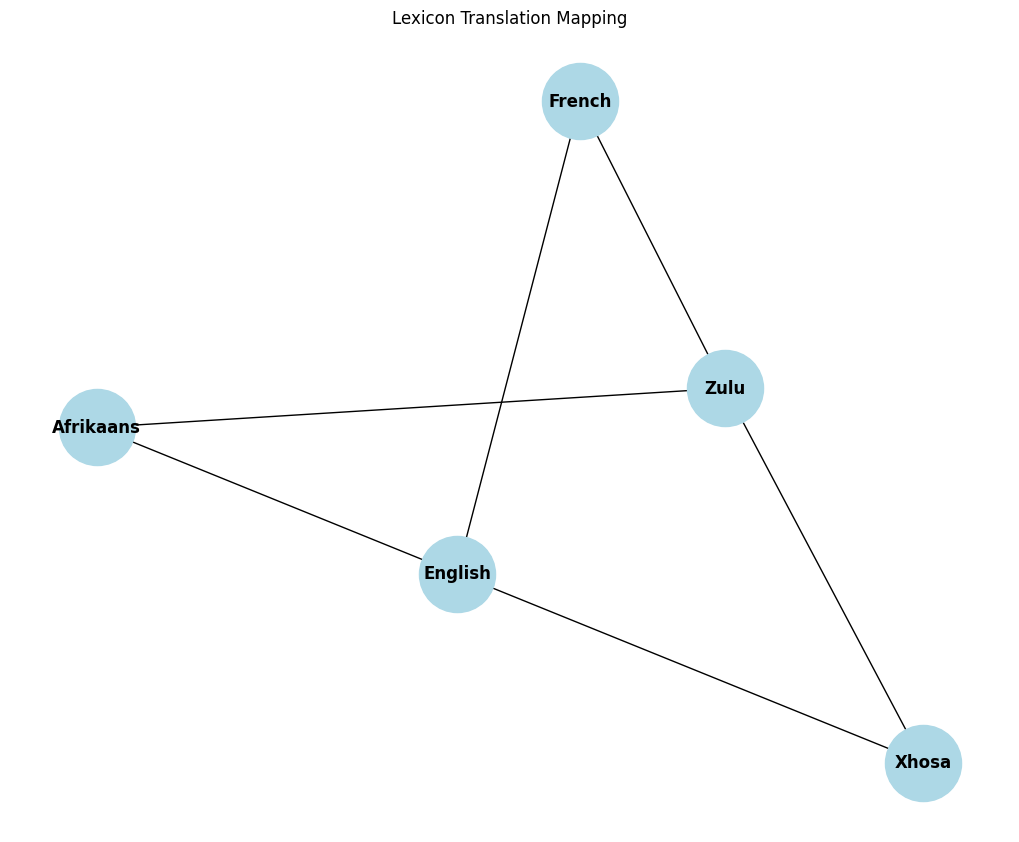

In [29]:
!pip install networkx
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Sample lexicon data: you may replace this with your actual lexicon DataFrame
data = {
    "Source Language": ["French", "French", "English", "English", "Zulu", "Afrikaans"],
    "Target Language": ["English", "Zulu", "Afrikaans", "Xhosa", "Xhosa", "Zulu"],
    "Translation Pair": ["bonjour-hello", "chien-inja", "hello-hallo", "thank-you", "inja", "hallo"]
}
df1 = pd.DataFrame(data)

# Create the graph
G = nx.Graph()

# Add nodes and edges
for _, row in df1.iterrows():
    source = row['Source Language']
    target = row['Target Language']
    G.add_node(source)
    G.add_node(target)
    G.add_edge(source, target)

# Draw the network graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  # Layout for better visualization
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=12, font_weight="bold")
plt.title("Lexicon Translation Mapping")
plt.show()



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


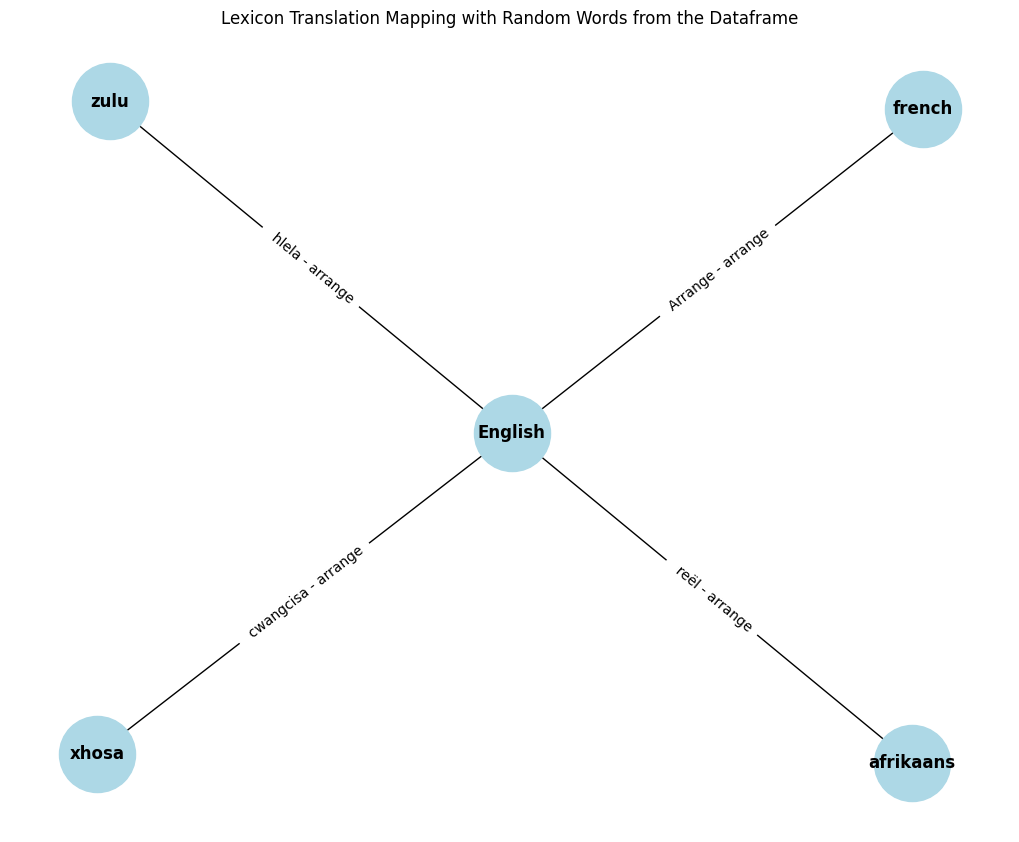

In [56]:
!pip install networkx
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random

# Sample lexicon data: replace this with your actual lexicon DataFrame
# data = {
#     "Source Language": ["French", "French", "English", "English", "Zulu", "Afrikaans"],
#     "Target Language": ["English", "Zulu", "Afrikaans", "Xhosa", "Xhosa", "Zulu"],
#     "Source Words": ["bonjour", "chien", "hello", "thank", "inja", "hallo"],
#     "Target Words": ["hello", "inja", "hallo", "enkosi", "enkosi", "inja"]
# }

df1 = df.copy(deep = True)

# Create the graph
G = nx.Graph()
# Add nodes and edges with random word labels
counter = 0
lang = ['afrikaans','zulu','xhosa','french']
for _, row in df1.iterrows():
    if counter > 1:
        break
    for lang in lang:
        source = row['english']
        target = row[lang]
        
        # Get random words from the 'Source Words' and 'Target Words' columns
        source_word = row['english']
        target_word = row[lang]
        
        # Add nodes and labeled edges
        G.add_node('English')
        G.add_node(lang)
        G.add_edge('English',lang, label=f"  {target_word} - {source_word} ")
        counter = counter + 1

# Draw the network graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  # Layout for better visualization
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=12, font_weight="bold")
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
plt.title("Lexicon Translation Mapping with Random Words from the Dataframe")
plt.show()


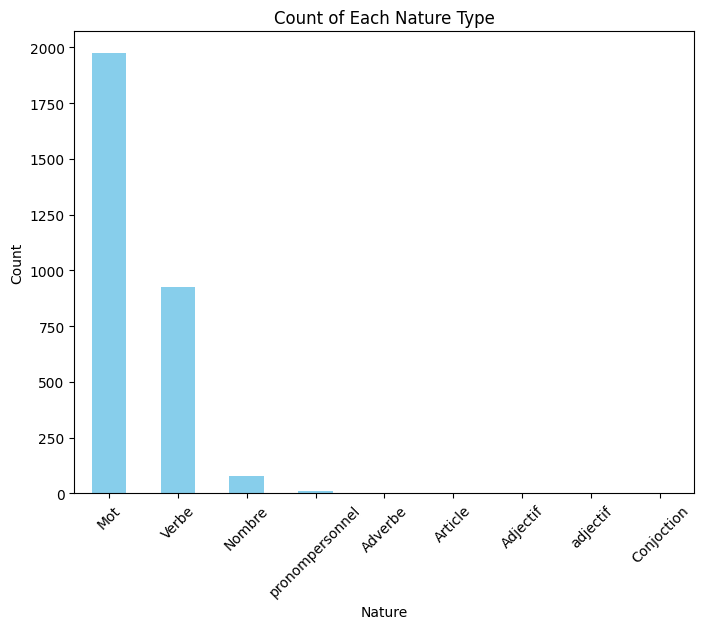

In [57]:
# Count the occurrences of each unique value in the "nature" column
nature_counts = df1['nature'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 6))
nature_counts.plot(kind='bar', color="skyblue")
plt.title("Count of Each Nature Type")
plt.xlabel("Nature")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

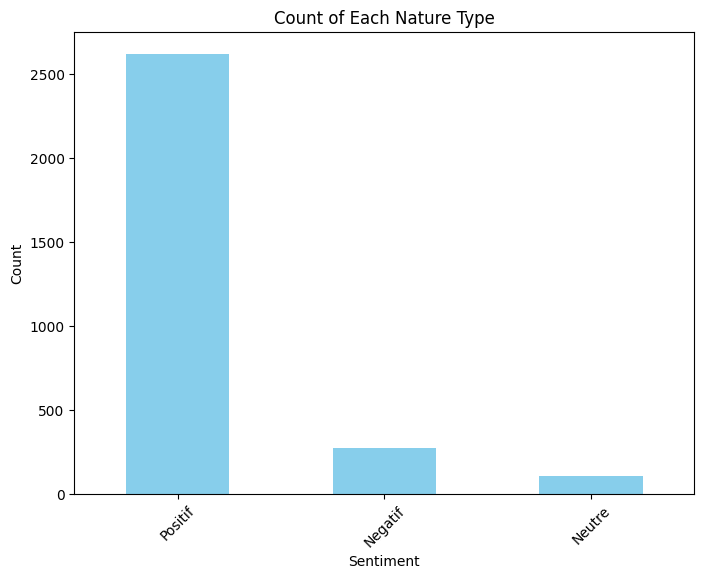

In [60]:
# Count the occurrences of each unique value in the "nature" column
nature_counts = df1['sentiment'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 6))
nature_counts.plot(kind='bar', color="skyblue")
plt.title("Count of Each Nature Type")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

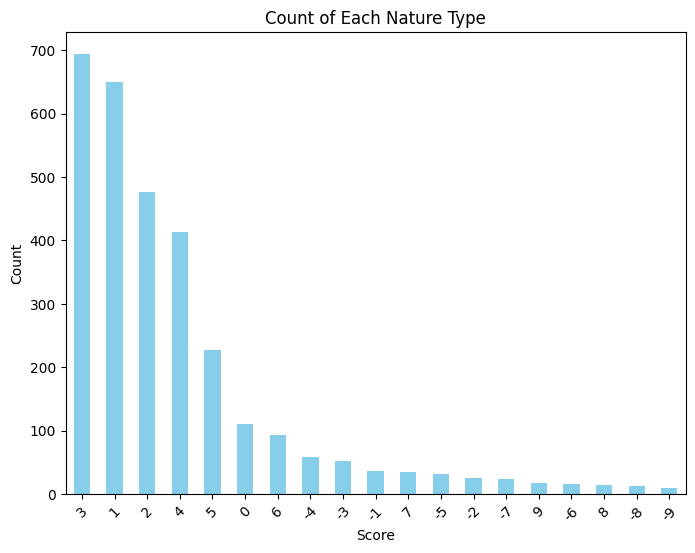

In [59]:
# Count the occurrences of each unique value in the "nature" column
nature_counts = df1['score'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 6))
nature_counts.plot(kind='bar', color="skyblue")
plt.title("Count of Each Nature Type")
plt.xlabel("Score")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Accuracy: 0.9083333333333333
Classification Report:
               precision    recall  f1-score   support

    Negative       0.60      0.54      0.57        59
     Neutral       0.92      0.81      0.86        27
    Positive       0.94      0.96      0.95       514

    accuracy                           0.91       600
   macro avg       0.82      0.77      0.79       600
weighted avg       0.90      0.91      0.91       600



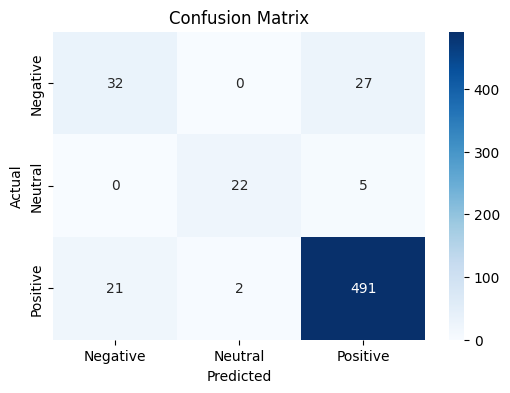

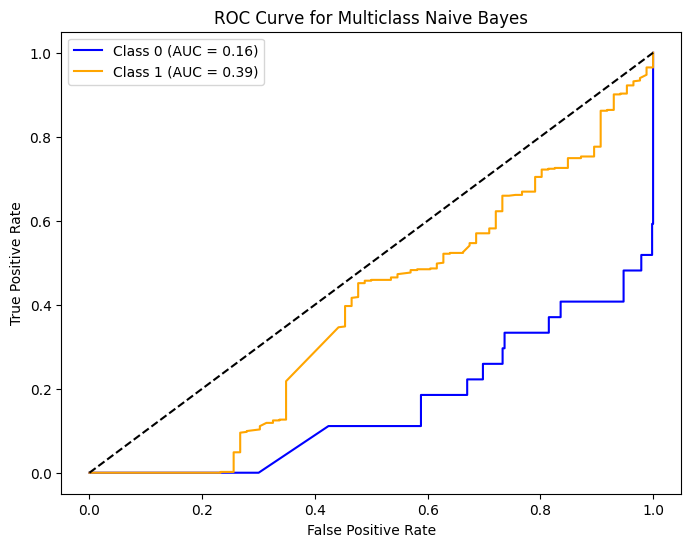

In [97]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Map sentiment labels to numerical values
df1['Sentiment_Label'] = df1['sentiment'].map({"Positif": 1, "Neutre": 0, "Negatif": -1})

# Combine the text from 'afrikaans', 'zulu', 'xhosa', 'ciluba', and 'french' columns into a single text column
df1['Combined_Text'] = df1[['afrikaans', 'zulu', 'xhosa', 'ciluba', 'french']].fillna('').agg(' '.join, axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df1['Combined_Text'], df1['Sentiment_Label'], test_size=0.2, random_state=42)

# Convert text data into a numerical format using CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Initialize and train the Naive Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(X_test_vec)
y_pred_proba = nb_model.predict_proba(X_test_vec)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=["Negative", "Neutral", "Positive"])

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve and AUC Score (for multiclass, using One-vs-Rest approach)
fpr = {}
tpr = {}
roc_auc = {}

plt.figure(figsize=(8, 6))
for i, color in zip(range(3), ['blue', 'orange', 'green']):  # 3 classes: Negative, Neutral, Positive
    # Check if at least two classes are present in y_test for this class
    if len(set(y_test == i)) > 1:
        fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred_proba[:, i])
        roc_auc[i] = roc_auc_score(y_test == i, y_pred_proba[:, i])
        plt.plot(fpr[i], tpr[i], color=color, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Naive Bayes')
plt.legend(loc="best")
plt.show()


Accuracy: 0.6782260753584528
Classification Report:
               precision    recall  f1-score   support

   afrikaans       0.97      0.77      0.86       599
      ciluba       0.99      0.65      0.78       616
      french       0.95      0.63      0.76       591
       xhosa       0.37      0.81      0.50       577
        zulu       0.75      0.54      0.63       616

    accuracy                           0.68      2999
   macro avg       0.80      0.68      0.71      2999
weighted avg       0.81      0.68      0.71      2999



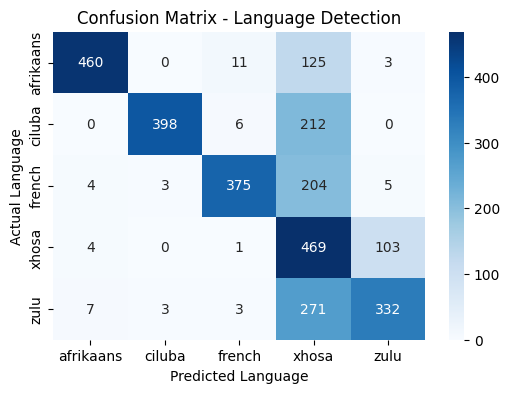

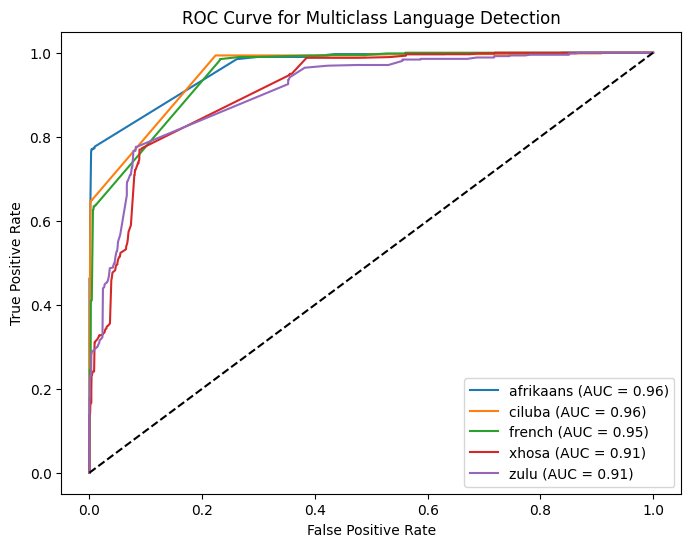

In [108]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming that each row in 'afrikaans', 'zulu', 'xhosa', 'ciluba', and 'french' represents a different language
# Transform the DataFrame into a "long format" with one row per language sample

# Example data - replace with your actual data
df2 = df[['afrikaans', 'zulu', 'xhosa', 'ciluba', 'french']].fillna('')

# Convert to long format with 'Combined_Text' and 'Language' columns
df_long = pd.DataFrame({
    'Combined_Text': pd.concat([df2['afrikaans'], df2['zulu'], df2['xhosa'], df2['ciluba'], df2['french']]),
    'Language': ['afrikaans'] * len(df2) + ['zulu'] * len(df2) + ['xhosa'] * len(df2) + ['ciluba'] * len(df2) + ['french'] * len(df2)
})

# Drop any rows where 'Combined_Text' might be empty (in case of NaNs)
df_long = df_long[df_long['Combined_Text'] != '']

# Define the feature and target
X = df_long['Combined_Text']
y = df_long['Language']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data into a numerical format using CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Initialize and train the Naive Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(X_test_vec)
y_pred_proba = nb_model.predict_proba(X_test_vec)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=nb_model.classes_)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.xlabel('Predicted Language')
plt.ylabel('Actual Language')
plt.title('Confusion Matrix - Language Detection')
plt.show()

# ROC Curve and AUC Score for each class (One-vs-Rest approach)
plt.figure(figsize=(8, 6))
fpr = {}
tpr = {}
roc_auc = {}

# Binarize the y_test labels for each language class
for i, language in enumerate(nb_model.classes_):
    # Create binary labels for the current language class
    y_test_binary = (y_test == language).astype(int)
    y_score = y_pred_proba[:, i]

    # Compute ROC curve and AUC
    fpr[language], tpr[language], _ = roc_curve(y_test_binary, y_score)
    roc_auc[language] = roc_auc_score(y_test_binary, y_score)
    
    # Plot ROC curve for the class
    plt.plot(fpr[language], tpr[language], label=f'{language} (AUC = {roc_auc[language]:.2f})')

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Language Detection')
plt.legend(loc="best")
plt.show()


Accuracy: 0.64
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       191
           1       0.64      1.00      0.78       384
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00        18
           8       0.00      0.00      0.00         1

    accuracy                           0.64       600
   macro avg       0.08      0.12      0.10       600
weighted avg       0.41      0.64      0.50       600



C:\Users\Tjoppie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Tjoppie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Tjoppie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

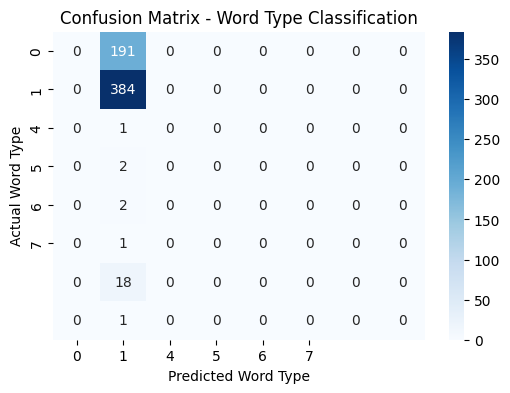

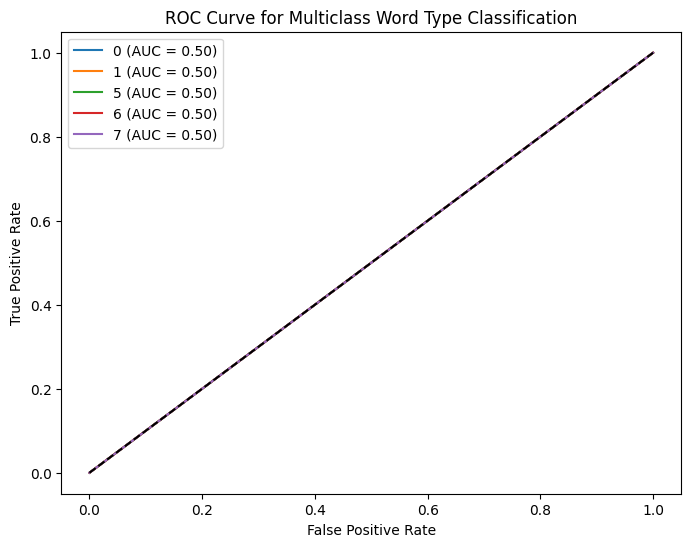

In [116]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df4 = df.copy()

# Feature Engineering: Calculate word length directly within each language column
df4['Word_Length'] = df4['french'].apply(lambda x: len(x) if pd.notnull(x) else 0)  # Length of word in 'french' column
df4['nature'] = df4['nature']  # Keep 'nature' as a feature

# Map word type labels to numerical values for the target column
df4['Word_Type_Label'] = df4['nature'].map({"Verbe": 0, "Mot": 1, "adjectif": 2, "Article": 3, "Adverbe": 4,
                                            "pronompersonnel": 5, "Adjectif": 6, "Nombre": 7, "Conjoction": 8})

# Define features (X) and target (y)
X = df4[['Word_Length']]
y = df4['Word_Type_Label']

# Drop rows with NaN values in 'Word_Type_Label'
df4 = df4.dropna(subset=['Word_Type_Label'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Naive Bayes Classifier
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(X_test)
y_pred_proba = nb_model.predict_proba(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.xlabel('Predicted Word Type')
plt.ylabel('Actual Word Type')
plt.title('Confusion Matrix - Word Type Classification')
plt.show()

# ROC Curve and AUC Score (One-vs-Rest approach)
fpr = {}
tpr = {}
roc_auc = {}

plt.figure(figsize=(8, 6))
for i, class_label in enumerate(nb_model.classes_):
    # Binary labels for current class
    y_test_binary = (y_test == class_label).astype(int)
    y_score = y_pred_proba[:, i]

    # Calculate ROC curve and AUC for each class
    if len(np.unique(y_test_binary)) > 1:  # Ensure there are at least two classes
        fpr[class_label], tpr[class_label], _ = roc_curve(y_test_binary, y_score)
        roc_auc[class_label] = roc_auc_score(y_test_binary, y_score)
        plt.plot(fpr[class_label], tpr[class_label], label=f'{class_label} (AUC = {roc_auc[class_label]:.2f})')

# Plot the diagonal line for random guessing
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Word Type Classification')
plt.legend(loc="best")
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn_crfsuite
from sklearn_crfsuite import metrics
import matplotlib.pyplot as plt
import seaborn as sns

# Sample lexicon data with entity types - replace this with your actual DataFrame
data = {
    "Word": ["John", "Paris", "IBM", "Mary", "London", "Apple", "BMW", "Eiffel"],
    "Entity": ["Person", "Location", "Organization", "Person", "Location", "Organization", "Organization", "Location"]
}
df2 = pd.DataFrame(data)

# Prepare data in CRF format (CRFsuite requires words as feature dicts)
def word_to_features(word):
    return {
        'word': word,
        'length': len(word),
        'is_upper': word.isupper(),
        'is_title': word.istitle(),
        'has_vowel': any(char in 'AEIOUaeiou' for char in word)
    }

X = [word_to_features(word) for word in df2['Word']]
y = df2['Entity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Conditional Random Field model
crf = sklearn_crfsuite.CRF(algorithm='lbfgs', max_iterations=100, all_possible_transitions=True)
crf.fit([X_train], [y_train])

# Make predictions on the test set
y_pred = crf.predict([X_test])

# Evaluate the model
labels = list(crf.classes_)
metrics.flat_classification_report([y_test], y_pred, labels=labels, digits=3)

print("Classification Report:\n", metrics.flat_classification_report([y_test], y_pred, labels=labels, digits=3))

# Confusion Matrix
conf_matrix = metrics.flat_confusion_matrix([y_test], y_pred, labels=labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Entity')
plt.ylabel('Actual Entity')
plt.title('Confusion Matrix - Named Entity Recognition')
plt.show()


In [91]:
df1.head()

,ciluba,french,english,afrikaans,zulu,xhosa,score,sentiment,nature,Sentiment_Label
0,Akaja,Arrange,arrange,reël,hlela,cwangcisa,1,Positif,Verbe,1
1,Akajilula,Rearrange,rearrange,herrangskik,hlela kabusha,cwangcisa ngokutsha,1,Positif,Verbe,1
2,Akula,Parle,speak,praat,khuluma,thetha,2,Positif,Verbe,1
3,Akulula,Reparle,speak again,praat weer,khuluma futhi,thetha kwakhona,2,Positif,Verbe,1
4,Aluja,Remet,hands over,hande oor,izandla phezu,izandla ngaphaya,3,Positif,Verbe,1
